- NMF = "non-negative matrix factorization"   
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)

### NMF applied to Wikipedia articles
apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix `articles`

In [179]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia/wikipedia-vectors.csv', index_col=0)
words = [x.strip('\n').split(' ')[0] for x in open('wikipedia/wikipedia-vocabulary-utf8.txt').readlines()]
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [167]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(articles.shape)
print(nmf_features.shape)

(60, 13125)
(60, 6)


In [164]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


0    0.003846
1    0.000000
2    0.000000
3    0.575663
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422345
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


The NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. 

#### NMF learns topics of documents

In [180]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.627908
award      0.253144
starred    0.245297
role       0.211462
actress    0.186407
Name: 3, dtype: float64


Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

### Recommender system: which articles are similar to 'Cristiano Ronaldo'?

In [192]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### LED digits dataset

In [189]:
import pandas as pd
from matplotlib import pyplot as plt

samples = pd.read_csv('lcd-digits.csv', header=None ).to_numpy()

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

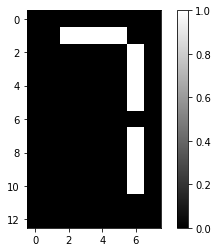

In [190]:
digit = samples[0,:]
show_as_image(digit)

### NMF learns the parts of images

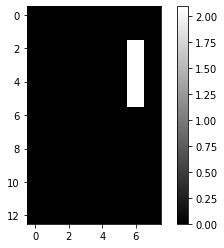

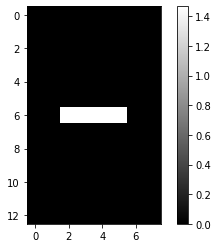

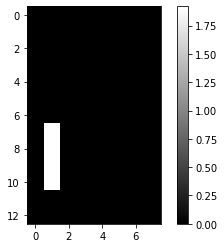

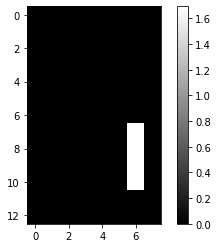

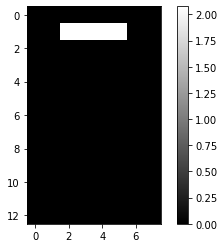

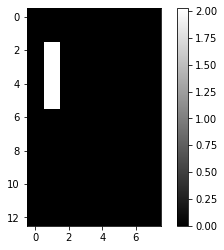

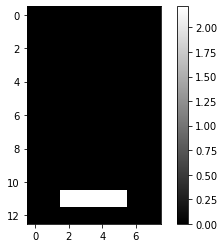

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [191]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7) #7 is the number of cells in an LED display

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!
7 = 0.47 * feature1 + 0.59 * feature4 + 0.48 * feature5